## **SETUP**
Installing and importing Tensorflow, matplotlib

In [1]:
%pip install --upgrade pip setuptools

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tensorflow-gpu==2.9.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.9.0 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.9.0


In [3]:
%pip install opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip list

Package                 Version
----------------------- ---------
absl-py                 2.1.0
aiohttp                 3.9.5
aiosignal               1.3.1
annotated-types         0.6.0
anyio                   4.3.0
asgiref                 3.7.2
assemblyai              0.32.0
asttokens               2.4.1
astunparse              1.6.3
attrs                   23.2.0
axios                   0.4.0
beautifulsoup4          4.12.3
bitsandbytes            0.43.1
blinker                 1.7.0
blis                    0.7.11
catalogue               2.0.10
certifi                 2024.2.2
charset-normalizer      3.3.2
click                   8.1.7
cloudpathlib            0.18.1
colorama                0.4.6
comm                    0.2.2
confection              0.1.5
contourpy               1.2.0
cycler                  0.12.1
cymem                   2.0.8
debugpy                 1.8.5
decorator               5.1.1
distro                  1.9.0
Django                  5.0.1
einops                 

In [5]:
import tensorflow as tf


In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')


[]

## **CLEANING DATA**


In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
filePath = 'data'
os.path.exists(filePath)

True

In [10]:
import keras
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from 'C:\\Users\\samne\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [11]:
import cv2
import imghdr

C:\Users\samne\AppData\Local\Temp\ipykernel_9076\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [12]:

melanoma = os.path.join(filePath, 'melanoma')


In [13]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [14]:
os.path.exists(melanoma)

True

In [15]:
os.listdir(filePath)

['acne', 'healthy skin', 'melanoma']

In [16]:
for image_class in os.listdir(filePath):
    for image in os.listdir(os.path.join(filePath, image_class)):

        image_path = os.path.join(filePath, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            print(e)
            # os.remove(image_path)

# **Loading Data**

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
data = tf.keras.utils.image_dataset_from_directory(filePath)

Found 300 files belonging to 3 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch  = data_iterator.next()
# Acne (0), Healthy Skin (1), Melanoma (2)
# Caution when running this multiple times


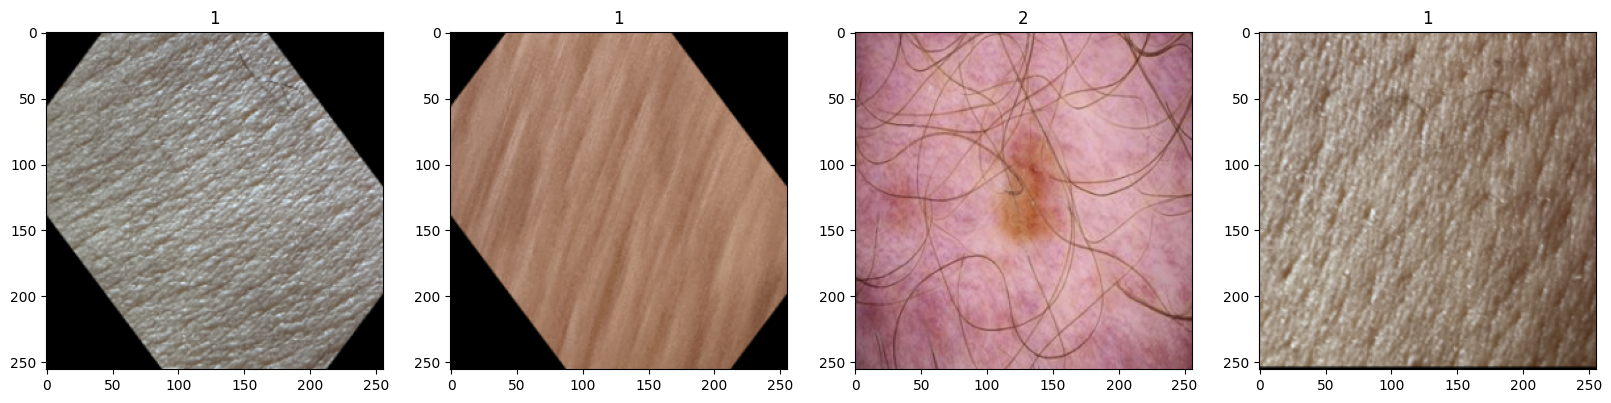

In [21]:
# Preview
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **Scale & Augment Data**

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom


augmentation_layer = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2)
])

ata = data.map(lambda x, y: (augmentation_layer(x), y))
data = data.map(lambda x,y: (x/255, y))


In [23]:
data.as_numpy_iterator().next()


(array([[[[8.6615205e-01, 7.5634813e-01, 6.7399520e-01],
          [8.7019211e-01, 7.6038820e-01, 6.7803526e-01],
          [8.6384755e-01, 7.5012207e-01, 6.7953384e-01],
          ...,
          [4.9477994e-01, 4.2811328e-01, 3.2615247e-01],
          [5.2621019e-01, 4.6346506e-01, 3.6260724e-01],
          [4.9499559e-01, 4.3225050e-01, 3.3421129e-01]],
 
         [[8.5951287e-01, 7.4970895e-01, 6.6735601e-01],
          [8.8061309e-01, 7.7080917e-01, 6.8845624e-01],
          [8.6213380e-01, 7.4840832e-01, 6.7782009e-01],
          ...,
          [5.0181049e-01, 4.3514380e-01, 3.3318302e-01],
          [5.3703922e-01, 4.7147551e-01, 3.7061769e-01],
          [5.0308001e-01, 4.4033492e-01, 3.4229568e-01]],
 
         [[8.7468141e-01, 7.6487750e-01, 6.8252456e-01],
          [8.6344212e-01, 7.5081956e-01, 6.7692250e-01],
          [8.6481529e-01, 7.5108975e-01, 6.8050152e-01],
          ...,
          [5.0065368e-01, 4.3398702e-01, 3.3202621e-01],
          [5.3033233e-01, 4.6256271e-

In [24]:
len(data)

10

# **Split Data**

In [25]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.20)
test_size = int(len(data)*20)
train_size


6

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
#len(train)
len(val)
len(test)


2

In [28]:
train


<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
#final layer should match the number of classes

C:\Users\samne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [33]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# **Train**

In [34]:
logdir='logs'


In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [36]:
hist = model.fit(train, epochs=11, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/11
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.4071 - loss: 1.4465 - val_accuracy: 0.4062 - val_loss: 1.0749
Epoch 2/11
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.5103 - loss: 1.0216 - val_accuracy: 0.6406 - val_loss: 0.8748
Epoch 3/11
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.6146 - loss: 0.8480 - val_accuracy: 0.7500 - val_loss: 0.6944
Epoch 4/11
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.6695 - loss: 0.7752 - val_accuracy: 0.6094 - val_loss: 0.8176
Epoch 5/11
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.6342 - loss: 0.7864 - val_accuracy: 0.7656 - val_loss: 0.6321
Epoch 6/11
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.7852 - loss: 0.5449 - val_accuracy: 0.7031 - val_loss: 0.5407
Epoch 7/11
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.7830 - loss: 0.4733 - val_accuracy: 0.9219 - val_loss: 0.3918
Epoch 8/11
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.8178 - loss: 0.4621 - val_accuracy: 0.7656 - val_loss:

# **Analysis**

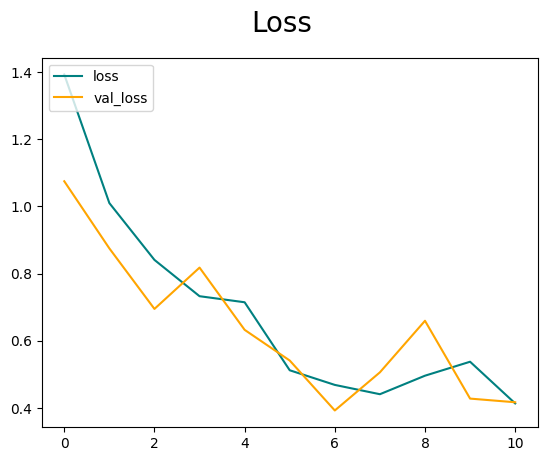

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **Evaluate**

In [38]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy


In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,091,419 (42.31 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,394,280 (28.21 MB)

In [40]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [41]:
'''
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    
    acc.update_state(y, yhat)
    pre.update_state(y, tf.argmax(yhat, axis=1))  # Converting predictions to label format
    re.update_state(y, tf.argmax(yhat, axis=1))
'''


'\nfor batch in test.as_numpy_iterator():\n    x, y = batch\n    yhat = model.predict(x)\n    \n    acc.update_state(y, yhat)\n    pre.update_state(y, tf.argmax(yhat, axis=1))  # Converting predictions to label format\n    re.update_state(y, tf.argmax(yhat, axis=1))\n'

In [42]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

def predict_fn(model, x):
    return model(x, training=False)

y_true = []
y_pred_classes = []

for batch in test.as_numpy_iterator():
    x, y = batch

    # Step 3: Call the predict function (this avoids retracing)
    y_pred = predict_fn(model, x)

    # Convert predictions to class labels
    y_pred_classes.extend([np.argmax(element) for element in y_pred.numpy()])
    y_true.extend(y)  # Collect true labels

# Step 4: Print the classification report
print("Classification Report: \n", classification_report(y_true, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.85      1.00      0.92        11
           2       0.92      1.00      0.96        12

    accuracy                           0.93        44
   macro avg       0.92      0.95      0.93        44
weighted avg       0.94      0.93      0.93        44



In [43]:
print(pre.result(), re.result(), acc.result())
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)
0.0 0.0 0.0


# **Testing**

In [44]:
import cv2

In [45]:
os.listdir()

['.git',
 '.gitignore.txt',
 'data',
 'logs',
 'main.py',
 'models',
 'modelTraining.ipynb',
 'node_modules',
 'out_of_data_tests',
 'package-lock.json',
 'package.json',
 'README.md',
 'runModel.py',
 '__pycache__']

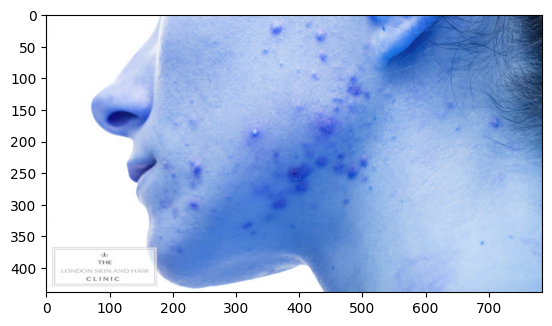

In [46]:
img = cv2.imread('out_of_data_tests/acne_test.jpeg')
plt.imshow(img)
plt.show()

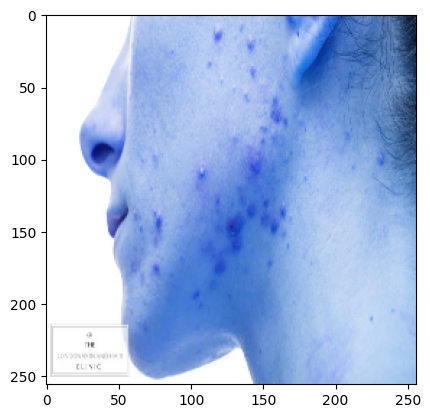

In [47]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [49]:
yhat[0]


array([0.05074769, 0.9480291 , 0.00122323], dtype=float32)

In [50]:
predicted_class = np.argmax(yhat, axis=1)
predicted_class

array([1], dtype=int64)

# **Saving Model**

In [51]:
from tensorflow.keras.models import load_model
#os.chdir('/content/drive/MyDrive/skindoctor')
os.getcwd()


'c:\\Users\\samne\\Relevant\\cs projects\\derm-ai'

In [52]:
model.save(os.path.join('models','skindoctor.keras'))


In [53]:
#os.path.exists('models')
#os.listdir('models')
os.getcwd()
#does it reset every time you referesh page?( what determines the currentwroking dir)

'c:\\Users\\samne\\Relevant\\cs projects\\derm-ai'

In [54]:
os.path.exists('models/skindoctor.keras')

True

In [55]:
new_model = load_model('models/skindoctor.keras')


In [56]:
print(new_model.predict(np.expand_dims(resize/255, 0)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[[0.05074769 0.9480291  0.00122323]]
